# RF with original labels using f1 score

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# save column data type to preserve them for input/output
col_dtype = {'recommended': float,
'num_review': float,
'num_owned_games': float,
'game_play_time': float,
'lag_month': float,
'dlc_price': float,
'game_price': float,
'Accounting': float,
'Action': float,
'Adventure': float,
'Animation&Modeling': float,
'AudioProduction': float,
'Casual': float,
'Design&Illustration': float,
'EarlyAccess': float,
'Education': float,
'FreetoPlay': float,
'Indie': float,
'MassivelyMultiplayer': float,
'PhotoEditing': float,
'RPG': float,
'Racing': float,
'Simulation': float,
'SoftwareTraining': float,
'Sports': float,
'Strategy': float,
'Utilities': float,
'VideoProduction': float,
'WebPublishing': float}

In [3]:
X = pd.read_csv('X_final_normalized.csv', dtype=col_dtype, index_col=0)
x = X

In [4]:
x.head()

,recommended,num_owned_games,game_play_time,lag_month,dlc_price,game_price,Accounting,Action,Adventure,Animation&Modeling,...,PhotoEditing,RPG,Racing,Simulation,SoftwareTraining,Sports,Strategy,Utilities,VideoProduction,WebPublishing
0,1.0,888.0,6.0,0.0,2.99,0.00,0.0,0.046069,0.035268,0.000000,...,0.0,0.015663,0.002611,0.011773,0.0,0.002611,0.018018,0.000051,0.000000,0.000102
1,1.0,213.0,5.0,0.0,2.99,0.00,0.0,0.021127,0.022834,0.000427,...,0.0,0.005548,0.000854,0.008109,0.0,0.001494,0.007469,0.000640,0.000213,0.000213
2,1.0,164.0,617.0,0.0,2.99,2.99,0.0,0.019678,0.023282,0.000277,...,0.0,0.011086,0.000000,0.007483,0.0,0.001109,0.003603,0.000554,0.000000,0.000554
3,1.0,304.0,1371.0,0.0,2.99,2.99,0.0,0.027213,0.014205,0.000000,...,0.0,0.013906,0.000299,0.007925,0.0,0.000000,0.013008,0.000000,0.000000,0.000000
4,1.0,304.0,10044.0,22.0,3.99,6.99,0.0,0.027213,0.014205,0.000000,...,0.0,0.013906,0.000299,0.007925,0.0,0.000000,0.013008,0.000000,0.000000,0.000000


## Train-test split

In [6]:
from sklearn.model_selection import train_test_split

predictors = ['num_owned_games', 
    'game_play_time',
    'lag_month',
    'dlc_price',
    'game_price',
    'Accounting', 'Action', 'Adventure', 'Animation&Modeling',
    'AudioProduction', 'Casual', 'Design&Illustration', 'EarlyAccess',
    'Education', 'FreetoPlay', 'Indie', 'MassivelyMultiplayer',
    'PhotoEditing', 'RPG', 'Racing', 'Simulation', 'SoftwareTraining',
    'Sports', 'Strategy', 'Utilities', 'VideoProduction', 'WebPublishing']

X_train, X_test, y_train, y_test = train_test_split(x[predictors], x['recommended'], train_size=0.8)

/Users/hyunjoohwang/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [6]:
len(predictors)

27

## Hyperparameter turning using grid search cv

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [8]:
#### Set up the model and GridSearch for random forest hyperparameter tuning
param_grid = [{'n_estimators': [500],
               'max_features': [5,10],
               'min_samples_split': [2, 4, 6],
               'max_depth': [20, 40, 60]}]

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=8)


print("# Tuning hyper-parameters")
print()

clf = GridSearchCV(rf, param_grid, cv=5, scoring='f1')
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'max_depth': 60, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}

Grid scores on development set:

0.882 (+/-0.004) for {'max_depth': 20, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}
0.881 (+/-0.004) for {'max_depth': 20, 'max_features': 5, 'min_samples_split': 4, 'n_estimators': 500}
0.881 (+/-0.004) for {'max_depth': 20, 'max_features': 5, 'min_samples_split': 6, 'n_estimators': 500}
0.882 (+/-0.004) for {'max_depth': 20, 'max_features': 10, 'min_samples_split': 2, 'n_estimators': 500}
0.882 (+/-0.004) for {'max_depth': 20, 'max_features': 10, 'min_samples_split': 4, 'n_estimators': 500}
0.881 (+/-0.005) for {'max_depth': 20, 'max_features': 10, 'min_samples_split': 6, 'n_estimators': 500}
0.883 (+/-0.004) for {'max_depth': 40, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 500}
0.883 (+/-0.004) for {'max_depth': 40, 'max_features': 5, 'min_samples_split': 4, 'n_e

In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 219  756]
 [ 111 3192]]
Normalized confusion matrix
[[ 0.22  0.78]
 [ 0.03  0.97]]


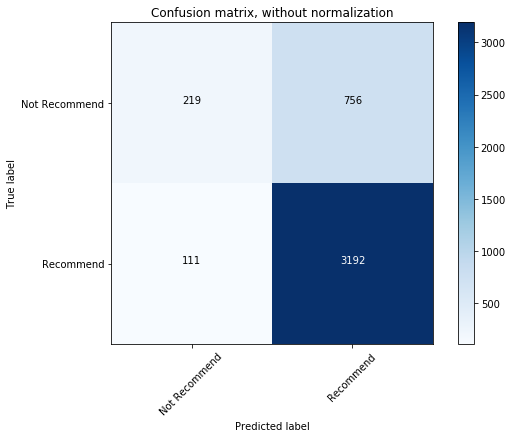

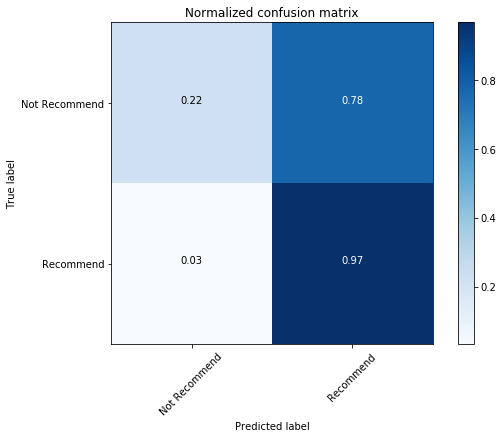

In [11]:
from sklearn.metrics import confusion_matrix
#tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0,1]).ravel()

rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, max_depth=60, max_features=5, min_samples_split=2, n_estimators=500)
rf.fit(X_train, y_train)
y_true, y_pred = y_test, rf.predict(X_test)

class_names = ['Not Recommend', 'Recommend']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Tuning the decision boundary

#### manually inspect how CV scores differ as you adjust the cutoff score

In [13]:
import sklearn.metrics
from sklearn.model_selection import cross_val_score

def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1] > cutoff).astype(int)

scores = []

def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        y_pred = cutoff_predict(clf, X, cutoff)
        return sklearn.metrics.f1_score(y, y_pred)
    
    return f1_cutoff

for cutoff in np.arange(0.1, 1.0, 0.1):
    pred_score = cross_val_score(rf, X_train, y_train, cv=5, scoring = custom_f1(cutoff))
    scores.append(pred_score)

In [14]:
i = 1.0
for score in scores:
    print("CV scores for cut off of %.1f" %(i*0.1), ":", score)
    i += 1

CV scores for cut off of 0.1 : [ 0.88  0.88  0.88  0.88  0.88]
CV scores for cut off of 0.2 : [ 0.88  0.88  0.88  0.88  0.88]
CV scores for cut off of 0.3 : [ 0.88  0.88  0.88  0.88  0.88]
CV scores for cut off of 0.4 : [ 0.89  0.88  0.88  0.88  0.89]
CV scores for cut off of 0.5 : [ 0.89  0.88  0.88  0.88  0.89]
CV scores for cut off of 0.6 : [ 0.88  0.88  0.87  0.87  0.88]
CV scores for cut off of 0.7 : [ 0.85  0.86  0.86  0.85  0.85]
CV scores for cut off of 0.8 : [ 0.75  0.75  0.76  0.75  0.75]
CV scores for cut off of 0.9 : [ 0.41  0.38  0.4   0.4   0.37]


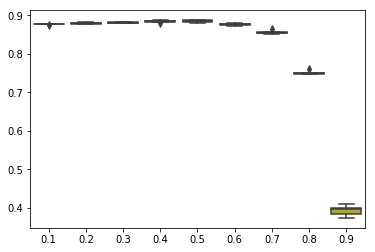

In [15]:
sns.boxplot(y=scores, x=np.arange(0.1, 1.0, 0.1))

#### use weighted f1 score

In [16]:
import sklearn.metrics
from sklearn.model_selection import cross_val_score

def cutoff_predict(clf, X, cutoff):
    return (clf.predict_proba(X)[:,1] > cutoff).astype(int)

scores_weighted = []

def custom_f1(cutoff):
    def f1_cutoff(clf, X, y):
        y_pred = cutoff_predict(clf, X, cutoff)
        return sklearn.metrics.f1_score(y, y_pred, average='weighted')
    
    return f1_cutoff

for cutoff in np.arange(0.1, 1.0, 0.1):
    pred_score = cross_val_score(rf, X_train, y_train, cv=5, scoring = custom_f1(cutoff))
    scores_weighted.append(pred_score)

In [17]:
i = 1.0
for score in scores_weighted:
    print("CV scores for cut off of %.1f" %(i*0.1), ":", score)
    i += 1

CV scores for cut off of 0.1 : [ 0.69  0.69  0.69  0.69  0.69]
CV scores for cut off of 0.2 : [ 0.71  0.7   0.7   0.71  0.71]
CV scores for cut off of 0.3 : [ 0.73  0.72  0.72  0.72  0.73]
CV scores for cut off of 0.4 : [ 0.75  0.74  0.74  0.74  0.75]
CV scores for cut off of 0.5 : [ 0.77  0.77  0.75  0.77  0.77]
CV scores for cut off of 0.6 : [ 0.78  0.78  0.77  0.77  0.78]
CV scores for cut off of 0.7 : [ 0.78  0.78  0.76  0.77  0.77]
CV scores for cut off of 0.8 : [ 0.69  0.69  0.7   0.68  0.69]
CV scores for cut off of 0.9 : [ 0.41  0.39  0.39  0.4   0.38]


Text(0.5,0,'descision threshold')

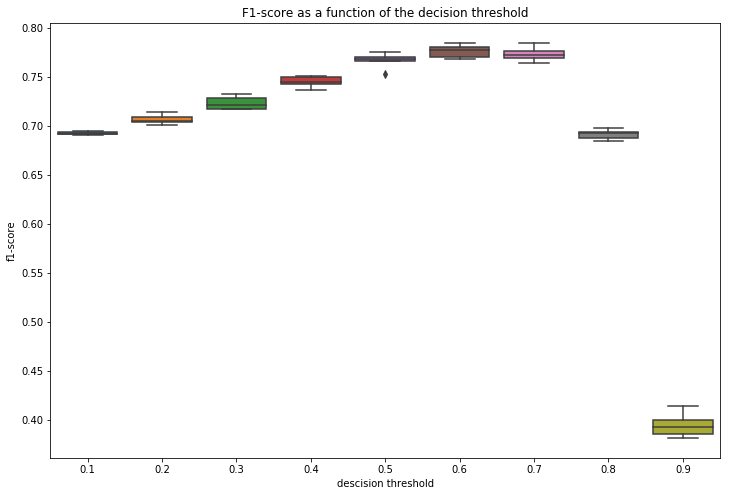

In [18]:
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(y=scores_weighted, x=np.arange(0.1, 1.0, 0.1), ax=ax)
ax.set_title('F1-score as a function of the decision threshold')
ax.set_ylabel('f1-score')
ax.set_xlabel('descision threshold')

#### using sklearn, see trade off between precision and recall

In [13]:
from sklearn.metrics import precision_recall_curve

y_pred = rf.predict_proba(X_test)[:,1]
p, r, thresholds = precision_recall_curve(y_test, y_pred)

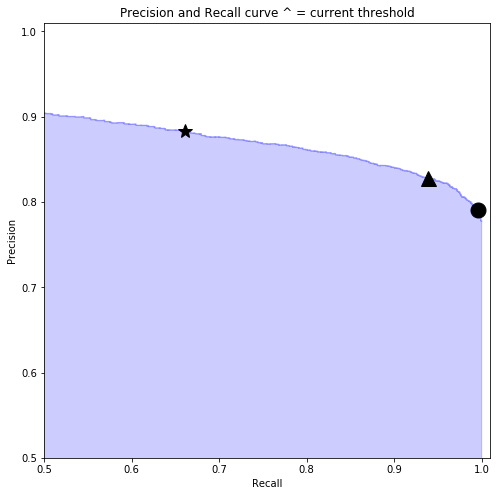

In [14]:
# plot the curve
t = 0.6
t1 = 0.8
t2 = 0.25

plt.figure(figsize=(8,8))
plt.title("Precision and Recall curve ^ = current threshold")
plt.step(r, p, color='b', alpha=0.2,
         where='post')
plt.fill_between(r, p, step='post', alpha=0.2,
                 color='b')
plt.ylim([0.5, 1.01]);
plt.xlim([0.5, 1.01]);
plt.xlabel('Recall');
plt.ylabel('Precision');

# plot the current threshold on the line
close_default_clf = np.argmin(np.abs(thresholds - t))
plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
        markersize=15)

close_default_clf = np.argmin(np.abs(thresholds - t1))
plt.plot(r[close_default_clf], p[close_default_clf], '*', c='k',
        markersize=15, label='0.8')

close_default_clf = np.argmin(np.abs(thresholds - t2))
plt.plot(r[close_default_clf], p[close_default_clf], 'o', c='k',
        markersize=15)

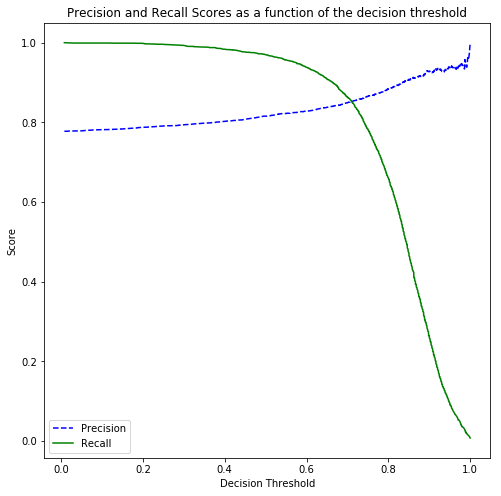

In [15]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    """
    Modified from:
    Hands-On Machine learning with Scikit-Learn
    and TensorFlow; p.89
    """
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    
plot_precision_recall_vs_threshold(p, r, thresholds)

## Replotting the confusion matrix with updated decision boundary

Confusion matrix, without normalization
[[ 639  336]
 [ 964 2339]]
Normalized confusion matrix
[[ 0.66  0.34]
 [ 0.29  0.71]]


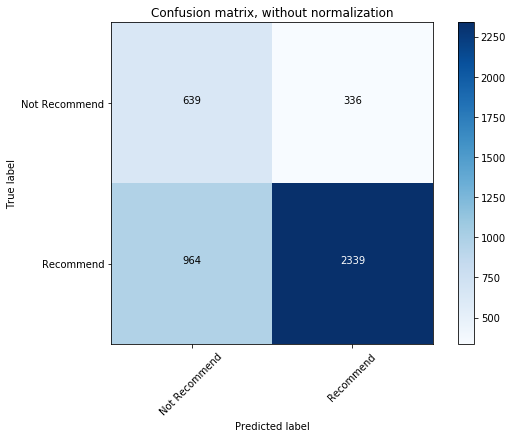

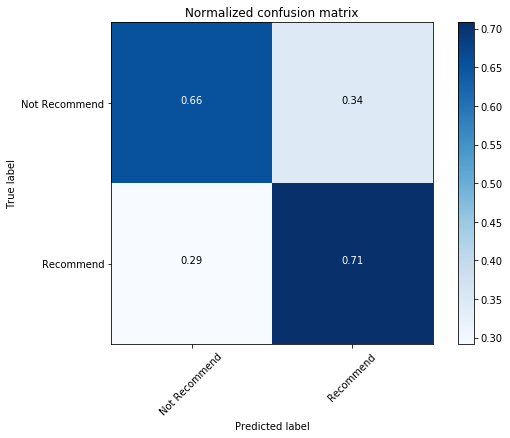

In [19]:
y_true, y_pred = y_test, cutoff_predict(rf, X_test, 0.78)

class_names = ['Not Recommend', 'Recommend']
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## Feature importance

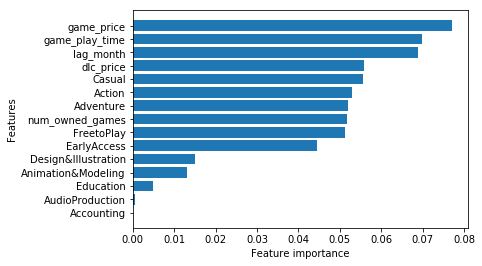

In [20]:
imp = rf.feature_importances_
names = X_train.columns

imp, names = zip(*sorted(zip(imp[:15], names[:15])))

plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)

plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.show()

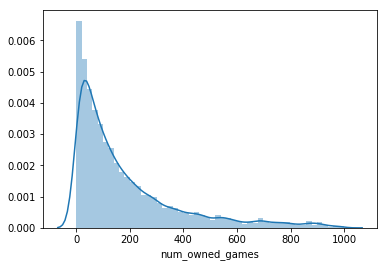

In [18]:
sns.distplot(X_train['num_owned_games'])

# Save model

In [20]:
from sklearn.externals import joblib

joblib.dump(rf, 'rf_f1.pkl') 

['rf_f1.pkl']

# Increase n_trees for performance

In [3]:
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve

In [22]:
from sklearn.model_selection import train_test_split

predictors = ['num_owned_games', 
    'game_play_time',
    'lag_month',
    'dlc_price',
    'game_price',
    'Accounting', 'Action', 'Adventure', 'Animation&Modeling',
    'AudioProduction', 'Casual', 'Design&Illustration', 'EarlyAccess',
    'Education', 'FreetoPlay', 'Indie', 'MassivelyMultiplayer',
    'PhotoEditing', 'RPG', 'Racing', 'Simulation', 'SoftwareTraining',
    'Sports', 'Strategy', 'Utilities', 'VideoProduction', 'WebPublishing']

X_train, X_test, y_train, y_test = train_test_split(x[predictors], x['recommended'], train_size=0.8, random_state=9)

/Users/hyunjoohwang/anaconda3/envs/insight/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
n_trees = ['100', '200', '300', '400', '500']

cv_score_tree = []

for n_tree in n_trees:
    rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=8, max_depth=60, max_features=5, min_samples_split=2, n_estimators=int(n_tree))
    cv = cross_val_score(rf, X_train, y_train, cv=5)
    
    cv_score_tree.append(cv)

In [39]:
cv_score_tree

[array([ 0.8,  0.8,  0.8,  0.8,  0.8]),
 array([ 0.8,  0.8,  0.8,  0.8,  0.8]),
 array([ 0.8 ,  0.81,  0.8 ,  0.8 ,  0.8 ]),
 array([ 0.8 ,  0.81,  0.8 ,  0.8 ,  0.8 ]),
 array([ 0.8 ,  0.81,  0.8 ,  0.8 ,  0.8 ])]